# 2. EDA

In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

### Frames

In [2]:
# Load and Display Basic Information
def load_dataset_info(data_dir):
    classes = [class_dir.name for class_dir in data_dir.iterdir() if class_dir.is_dir()]
    videos_info = []
    
    for class_name in classes:
        class_dir = data_dir / class_name
        for video_dir in class_dir.iterdir():
            if video_dir.is_dir():
                num_frames = len(list(video_dir.glob('*.jpg')))
                videos_info.append({'class': class_name, 'video': video_dir.name, 'frames': num_frames})
                
    return pd.DataFrame(videos_info)

# Visualize Sample Frames
def display_sample_frames(data_dir, num_samples=5):
    sample_dirs = np.random.choice(list(data_dir.glob('*/*')), num_samples, replace=False)
    
    fig, axs = plt.subplots(1, num_samples, figsize=(20, 5))
    for i, sample_dir in enumerate(sample_dirs):
        sample_frame = np.random.choice(list(sample_dir.glob('*.jpg')))
        img = cv2.imread(str(sample_frame))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[i].imshow(img)
        axs[i].set_title(sample_dir.parent.name)
        axs[i].axis('off')
    plt.show()

# Frame Distribution Analysis
def analyze_frame_distribution(dataset_info):
    plt.figure(figsize=(10, 6))
    plt.hist(dataset_info['frames'], bins=50, color='skyblue')
    plt.title('Frame Distribution Across Videos')
    plt.xlabel('Number of Frames')
    plt.ylabel('Frequency')
    plt.show()

# Pixel Value Analysis
def analyze_pixel_values(data_dir, num_samples=100):
    sample_frames = np.random.choice(list(data_dir.glob('*/*/*.jpg')), num_samples, replace=False)
    pixel_values = []
    
    for frame_path in sample_frames:
        img = cv2.imread(str(frame_path), cv2.IMREAD_GRAYSCALE)
        pixel_values.extend(img.flatten())
        
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=255, color='gray')
    plt.title('Pixel Value Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

In [4]:
data_dir = Path('./kaggle-dataset-6classes-preprocessed/frames')
dataset_info = load_dataset_info(data_dir)
print(dataset_info.head())

  class video  frames
0  test     0    5247
1  test     1    4133
2  test     2    6765
3  test     3    2112
4  test     4    4769


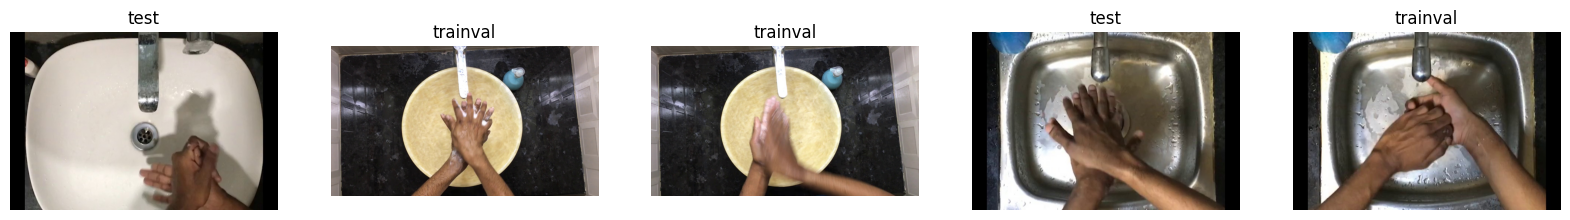

In [5]:
display_sample_frames(data_dir)

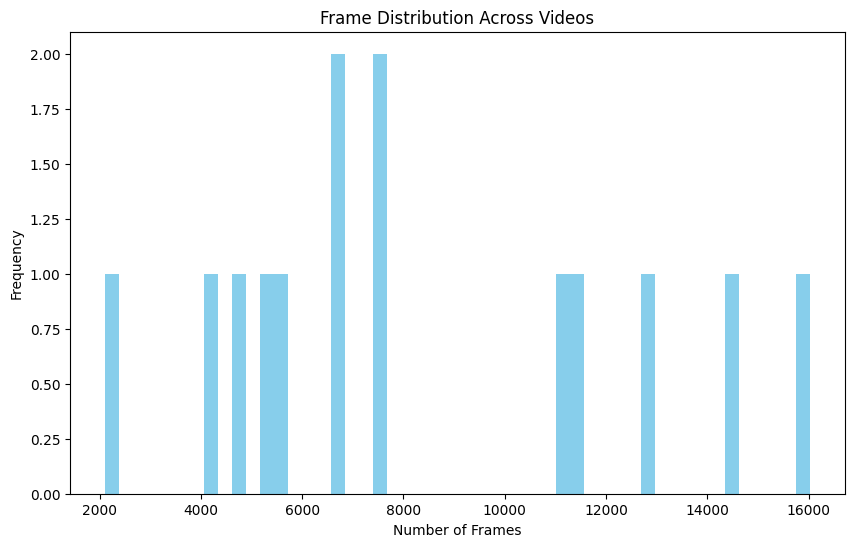

In [6]:
analyze_frame_distribution(dataset_info)

In [ ]:
analyze_pixel_values(data_dir)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\msila\.conda\envs\pythonProject\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\msila\AppData\Local\Temp\ipykernel_13852\3926541282.py", line 1, in <module>
  File "C:\Users\msila\AppData\Local\Temp\ipykernel_13852\3609161120.py", line 48, in analyze_pixel_values
  File "C:\Users\msila\.conda\envs\pythonProject\lib\site-packages\matplotlib\pyplot.py", line 3236, in hist
  File "C:\Users\msila\.conda\envs\pythonProject\lib\site-packages\matplotlib\__init__.py", line 1478, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "C:\Users\msila\.conda\envs\pythonProject\lib\site-packages\matplotlib\axes\_axes.py", line 6775, in hist
  File "C:\Users\msila\.conda\envs\pythonProject\lib\site-packages\matplotlib\cbook.py", line 1413, in _reshape_2D
MemoryError

During handling of the above exception, another exception occu

Error in callback <function _draw_all_if_interactive at 0x000002BC2567A560> (for post_execute), with arguments args (),kwargs {}:


### Videos

In [3]:
def video_duration_analysis(video_paths):
    durations = []
    for video_path in video_paths:
        cap = cv2.VideoCapture(str(video_path))
        frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        fps = cap.get(cv2.CAP_PROP_FPS)
        duration = frames / fps
        durations.append(duration)
        cap.release()
    
    plt.figure(figsize=(10, 6))
    plt.hist(durations, bins=50, color='skyblue')
    plt.title('Video Duration Distribution')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Videos')
    plt.show()
    
def frame_difference(video_path, sample_rate=30):
    cap = cv2.VideoCapture(str(video_path))
    prev_frame = None
    diffs = []
    
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        if prev_frame is not None:
            diff = cv2.absdiff(prev_frame, gray)
            diffs.append(diff.sum())
        prev_frame = gray
        
        # Skip 'sample_rate' frames
        for _ in range(sample_rate):
            cap.grab()
    
    cap.release()
    plt.figure(figsize=(10, 6))
    plt.plot(diffs)
    plt.title('Frame Difference Over Time')
    plt.xlabel('Time')
    plt.ylabel('Frame Difference Sum')
    plt.show()
    
def plot_class_distribution(video_paths):
    class_names = [path.parent.name for path in video_paths]
    class_distribution = pd.Series(class_names).value_counts()
    
    plt.figure(figsize=(10, 6))
    class_distribution.plot(kind='bar')
    plt.title('Class Distribution in Videos')
    plt.xlabel('Class')
    plt.ylabel('Number of Videos')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
video_dir = Path('./kaggle-dataset-6classes-preprocessed/videos')
video_paths = list(video_dir.glob('*/*.mp4'))  # Adjust glob pattern as necessary
video_duration_analysis(video_paths)

In [ ]:
plot_class_distribution(video_paths)

In [ ]:
sample_video_path = next(video_dir.glob('*/*.mp4'))  # Just an example to get one video
frame_difference(sample_video_path)